In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
Cus_data=pd.read_csv('Customer_Behaviour.csv')
Cus_data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
Cus_data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [6]:
Cus_data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [9]:
a=Cus_data.groupby("Gender")
a.get_group("Male")

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
8,15600575,Male,25,33000,0
...,...,...,...,...,...
390,15807837,Male,48,33000,1
391,15592570,Male,47,23000,1
393,15635893,Male,60,42000,1
396,15706071,Male,51,23000,1


In [10]:
a.get_group('Female')

,User ID,Gender,Age,EstimatedSalary,Purchased
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
9,15727311,Female,35,65000,0
...,...,...,...,...,...
392,15748589,Female,45,45000,1
394,15757632,Female,39,59000,0
395,15691863,Female,46,41000,1
397,15654296,Female,50,20000,1


Text(0, 0.5, 'Salary')

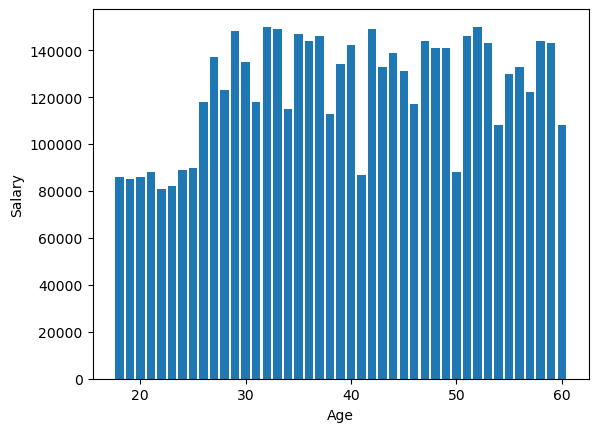

In [14]:
plt.bar(Cus_data["Age"],Cus_data["EstimatedSalary"])
plt.xlabel("Age")
plt.ylabel("Salary")

In [15]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [16]:
Cus_data['Gender']=le.fit_transform(Cus_data["Gender"])
Cus_data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [37]:
x=Cus_data.iloc[:,[1,2,3]]
y=Cus_data.iloc[:,[4]]


In [38]:
from sklearn.model_selection import train_test_split
x_T,x_t,y_T,y_t=train_test_split(x,y,test_size=0.30)

* In logistic regression, we will do feature scaling because we want accurate result of predictions. Here we will only scale the independent variable because dependent variable have only 0 and 1 values. Below is the code for it: if we are not scaling will get less accuracy.without scaling its accuracy was .68 and noew its 0.86

In [41]:
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()
x_T_S=Sc.fit_transform(x_T)
x_t_S=Sc.fit_transform(x_t)

In [42]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression()
Lr.fit(x_T_S,y_T)

E:\A\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [46]:
y_pred=Lr.predict(x_t_S)
y_pred

array([1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [47]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_t,y_pred)
cm

array([[70,  3],
       [17, 30]], dtype=int64)

In [48]:
from sklearn.metrics import accuracy_score
asc=accuracy_score(y_t,y_pred)
asc

0.8333333333333334